# Nutrition Analysis Tour
## Descriptive statistics on cleaned .csv file using pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sb_desc = pd.read_csv("sb_clean.csv")
sb_desc.head()

,category,name,size_oz,milk_type,calories,calories_%dv,caffeine_mg,caffeine_%dv,total_fat_g,fat_%dv,...,carbs_g,chol_mg,fiber_g,sugars_g,sugars_%dv,protein_g,vit_a_%dv,vit_c_%dv,calcium_%dv,iron_%dv
0,Classic Espresso Drinks,Caffè Latte,8,Nonfat,70,4.0,75,19.0,0.0,0.0,...,75,10,0,9,18.0,6.0,10,0,20,0
1,Classic Espresso Drinks,Caffè Latte,8,2%,100,5.0,75,19.0,4.0,4.0,...,85,10,0,9,18.0,6.0,10,0,20,0
2,Classic Espresso Drinks,Caffè Latte,8,Soy,70,4.0,75,19.0,2.0,3.0,...,65,6,1,4,8.0,5.0,6,0,20,8
3,Classic Espresso Drinks,Caffè Latte,12,Nonfat,100,5.0,75,19.0,0.0,0.0,...,120,15,0,14,28.0,10.0,15,0,30,0
4,Classic Espresso Drinks,Caffè Latte,12,2%,150,8.0,75,19.0,6.0,8.0,...,135,15,0,14,28.0,10.0,15,0,30,0


In [4]:
# for each category, show avg cal%, caff%, fat%, sug% FOR 16oz
# first create df containing only 16 oz drinks
grande = sb_desc[sb_desc["size_oz"] == 16]
grande

,category,name,size_oz,milk_type,calories,calories_%dv,caffeine_mg,caffeine_%dv,total_fat_g,fat_%dv,...,carbs_g,chol_mg,fiber_g,sugars_g,sugars_%dv,protein_g,vit_a_%dv,vit_c_%dv,calcium_%dv,iron_%dv
6,Classic Espresso Drinks,Caffè Latte,16,Nonfat,130,6.0,150,38.0,0.0,0.0,...,150,19,0,18,36.0,13.0,20,0,40,0
7,Classic Espresso Drinks,Caffè Latte,16,2%,190,10.0,150,38.0,7.0,9.0,...,170,19,0,17,34.0,12.0,20,2,40,0
8,Classic Espresso Drinks,Caffè Latte,16,Soy,150,8.0,150,38.0,5.0,6.0,...,130,13,1,8,16.0,10.0,15,0,40,15
18,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),16,Nonfat,220,11.0,175,44.0,2.0,3.0,...,125,43,2,34,68.0,13.0,20,0,35,25
19,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),16,2%,260,13.0,175,44.0,8.0,10.0,...,140,42,2,34,68.0,13.0,15,2,35,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,Frappuccino® Light Blended Coffee,Caramel,16,Nonfat,150,8.0,90,22.0,0.0,0.0,...,200,33,0,32,64.0,3.0,6,0,10,0
206,Frappuccino® Light Blended Coffee,Java Chip,16,Nonfat,220,11.0,105,26.0,4.0,5.0,...,240,43,2,39,78.0,5.0,6,0,10,25
210,Classic Espresso Drinks,Skinny Latte (Any Flavour),16,Nonfat,120,6.0,150,38.0,0.0,0.0,...,160,18,0,16,32.0,12.0,20,0,35,0
214,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),16,NaN,280,14.0,0,0.0,0.0,0.0,...,20,70,0,65,130.0,0.0,0,0,0,0


In [11]:
# Then group by category and apply mean, std functions
result = grande.groupby("category").agg(avg_cal = ("calories_%dv", "mean"), sd_cal = ("calories_%dv", "std"),
                               avg_caff = ("caffeine_%dv", "mean"), sd_caff = ("caffeine_%dv", "std"),
                               avg_fat = ("fat_%dv", "mean"), sd_fat = ("fat_%dv", "std"),
                               avg_sug = ("sugars_%dv", "mean"), sd_sug = ("sugars_%dv", "std"))
result

,avg_cal,sd_cal,avg_caff,sd_caff,avg_fat,sd_fat,avg_sug,sd_sug
category,,,,,,,,
Classic Espresso Drinks,8.142857,3.548719,40.571429,5.109784,4.285714,3.831621,39.142857,24.238739
Coffee,0.000000,NaN,82.000000,NaN,0.000000,NaN,0.000000,NaN
Frappuccino® Blended Coffee,13.666667,1.922751,25.750000,2.988615,3.583333,2.874918,112.666667,9.847319
Frappuccino® Blended Crème,12.250000,0.500000,0.000000,0.000000,2.000000,2.449490,104.000000,4.898979
Frappuccino® Light Blended Coffee,8.250000,2.061553,24.000000,1.632993,1.500000,2.380476,63.500000,10.878113
Shaken Iced Beverages,5.500000,1.000000,31.250000,7.762087,0.750000,0.957427,45.500000,3.000000
Signature Espresso Drinks,14.000000,3.527668,24.600000,17.385818,7.500000,4.927248,86.800000,27.716020
Smoothies,14.000000,0.500000,1.777778,2.108185,3.000000,1.870829,73.555556,6.912147
Tazo® Tea Drinks,11.888889,3.480102,14.666667,11.135529,4.222222,3.492054,81.111111,21.705094


In [17]:
# Remove NaN values
result.loc["Coffee"] = 0
result

,avg_cal,sd_cal,avg_caff,sd_caff,avg_fat,sd_fat,avg_sug,sd_sug
category,,,,,,,,
Classic Espresso Drinks,8.142857,3.548719,40.571429,5.109784,4.285714,3.831621,39.142857,24.238739
Coffee,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Frappuccino® Blended Coffee,13.666667,1.922751,25.750000,2.988615,3.583333,2.874918,112.666667,9.847319
Frappuccino® Blended Crème,12.250000,0.500000,0.000000,0.000000,2.000000,2.449490,104.000000,4.898979
Frappuccino® Light Blended Coffee,8.250000,2.061553,24.000000,1.632993,1.500000,2.380476,63.500000,10.878113
Shaken Iced Beverages,5.500000,1.000000,31.250000,7.762087,0.750000,0.957427,45.500000,3.000000
Signature Espresso Drinks,14.000000,3.527668,24.600000,17.385818,7.500000,4.927248,86.800000,27.716020
Smoothies,14.000000,0.500000,1.777778,2.108185,3.000000,1.870829,73.555556,6.912147
Tazo® Tea Drinks,11.888889,3.480102,14.666667,11.135529,4.222222,3.492054,81.111111,21.705094


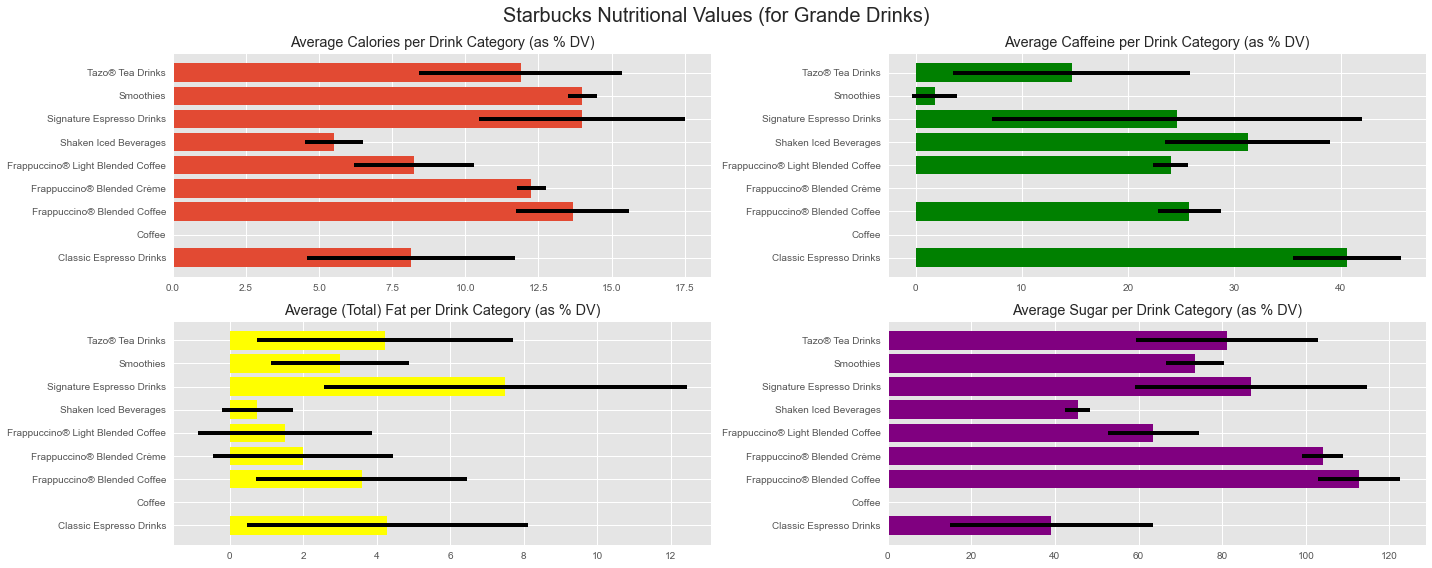

In [32]:
plt.style.use('ggplot')
plt.figure(figsize=(20,8))
plt.suptitle("Starbucks Nutritional Values (for Grande Drinks)", fontsize=20)

plt.subplot(2,2,1)
plt.title("Average Calories per Drink Category (as % DV)")
plt.barh(result["avg_cal"].index.values, result["avg_cal"], xerr = result["sd_cal"])

plt.subplot(2,2,2)
plt.title("Average Caffeine per Drink Category (as % DV)")
plt.barh(result["avg_caff"].index.values, result["avg_caff"], xerr = result["sd_caff"], color = "green")

plt.subplot(2,2,3)
plt.title("Average (Total) Fat per Drink Category (as % DV)")
plt.barh(result["avg_fat"].index.values, result["avg_fat"], xerr = result["sd_fat"], color = "yellow")

plt.subplot(2,2,4)
plt.title("Average Sugar per Drink Category (as % DV)")
plt.barh(result["avg_sug"].index.values, result["avg_sug"], xerr = result["sd_sug"], color = "purple")

plt.tight_layout()

In [100]:
# What are the top 5 drinks for a good caffeine hit?
caffy = sb_desc.nlargest(5, ["caffeine_%dv"])
caffy[["category", "name", "size_oz", "caffeine_%dv"]]

,category,name,size_oz,caffeine_%dv
190,Coffee,Brewed Coffee,20,102.0
189,Coffee,Brewed Coffee,16,82.0
194,Classic Espresso Drinks,Caffè Americano,20,75.0
188,Coffee,Brewed Coffee,12,65.0
218,Shaken Iced Beverages,Iced Brewed Coffee (With Classic Syrup),20,59.0


In [99]:
# What are the top 5 drinks for a good sugar hit?
sugga = sb_desc.nlargest(5, ["sugars_%dv"])
sugga[["category", "name", "size_oz", "sugars_%dv"]]

,category,name,size_oz,sugars_%dv
171,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),20,168.0
172,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),20,168.0
215,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),20,166.0
173,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),20,160.0
162,Frappuccino® Blended Coffee,Caramel (Without Whipped Cream),20,154.0


In [68]:
# Is there a correlation between sugar and caffeine in 16oz drinks?
sug = grande.groupby(["category"])["sugars_%dv"].mean()
caff = grande.groupby(["category"])["caffeine_%dv"].mean()

category
Classic Espresso Drinks               39.142857
Coffee                                 0.000000
Frappuccino® Blended Coffee          112.666667
Frappuccino® Blended Crème           104.000000
Frappuccino® Light Blended Coffee     63.500000
Shaken Iced Beverages                 45.500000
Signature Espresso Drinks             86.800000
Smoothies                             73.555556
Tazo® Tea Drinks                      81.111111
Name: sugars_%dv, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

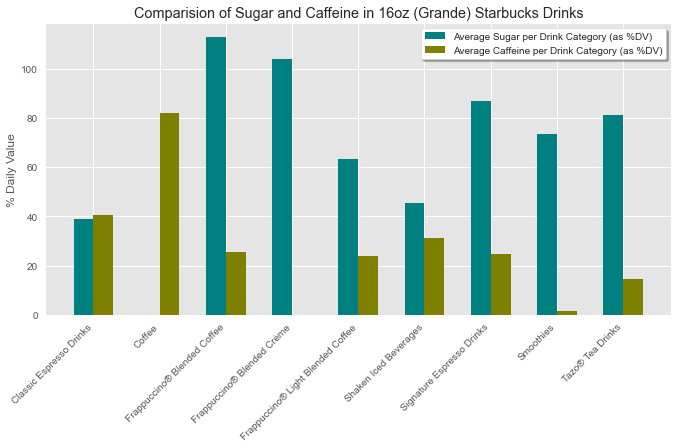

In [93]:
plt.figure(figsize=(10,5))
plt.bar(sug.index.values, sug, color = "teal", width = -0.3, align = "edge", label = "Average Sugar per Drink Category (as %DV)")
plt.bar(caff.index.values, caff, color = "olive", width = 0.3, align = "edge", label = "Average Caffeine per Drink Category (as %DV)")
plt.title("Comparision of Sugar and Caffeine in 16oz (Grande) Starbucks Drinks")
plt.ylabel("% Daily Value")
plt.legend(loc = "upper right", shadow = True, frameon = True, facecolor = "white") 
plt.xticks(rotation=45, ha='right')

In [109]:
# For each 20oz drink that has a milk value, what is avg cal for each milk type?
# First filter data set for 20oz drinks that contain (any) milk.  Even soy.

tall_milk = sb_desc[(sb_desc["size_oz"] == 20) & (sb_desc["milk_type"] != 'NaN') & (sb_desc["milk_type"] != 'Whole')]
tall_milk["milk_type"].value_counts()

Nonfat    21
Soy       16
2%        11
Name: milk_type, dtype: int64

In [110]:
tall_milk.groupby("milk_type")["calories_%dv"].mean()

milk_type
2%        15.636364
Nonfat    13.095238
Soy       14.750000
Name: calories_%dv, dtype: float64

In [116]:
#titanic.groupby(["sex", "pclass", "survived"])["age"].mean()
tall_milk.groupby(["milk_type", "category"])["calories_%dv"].mean()

milk_type  category                         
2%         Classic Espresso Drinks              13.250000
           Shaken Iced Beverages                 9.000000
           Signature Espresso Drinks            20.000000
           Tazo® Tea Drinks                     16.666667
Nonfat     Classic Espresso Drinks               9.600000
           Frappuccino® Blended Coffee          17.500000
           Frappuccino® Blended Crème           16.000000
           Frappuccino® Light Blended Coffee    10.500000
           Shaken Iced Beverages                 8.000000
           Signature Espresso Drinks            16.666667
           Tazo® Tea Drinks                     13.666667
Soy        Classic Espresso Drinks              11.000000
           Frappuccino® Blended Coffee          18.250000
           Frappuccino® Blended Crème           16.000000
           Shaken Iced Beverages                 8.000000
           Signature Espresso Drinks            17.000000
           Tazo® Tea Drinks